<h2 align="center">CIE 417 (Fall 2022)</h2>
<h2 align="center">Lab 4: Model Selection & KNN </h2>

## Discussion Points:
- Parametric VS non-parametric models
- Classification
- KNN Algorithm
- Notes on KNN:
> 1. Distance (manhattan & euclidean)
> 2. Choosing K
> 4. The curse of dimensionality
- Investigating the Iris dataset
- Should we normalize our data?

- Model Selection using Cross Validation (Validation Set, LOOCV & K-fold CV)
- Grid Search CV 
- Closing Remarks

# What is Classification?
<img src="https://miro.medium.com/max/1400/0*m85bAFJiPG7Z0L3w.png" align = 'center' style="width: 600px;">

# Parametric VS non-parametric models
- In parametric models:
> The function that should fit the data is known. <br>
> For example, in linear regression, we know that we should fit the data with a line with the following equation: $ y = WX + b $
- In non-parametric models:
> The data speakes for itself where a function $F(X)$ will fit your data. $F(X)$ can then be approximated to a function with any number of parameters.

## KNN Algorithm
> 1. Calculate the distances between all the training data and the test point.
> 2. Find the nearest K neighbors by sorting these pairwise distances.
> 3. Classify the point based on a majority vote.

<img src="https://miro.medium.com/max/591/0*DgJ3Xx6QzWleIkXC.png" align = 'right' style ="500px">

You can check this link for a demo: https://lecture-demo.ira.uka.de/knn-demo/

### Notes on KNN   
>
1. How calculate the distance? 
> **Minkowski Distance:** 
> - If p is set to 1, we get the Manhattan distance. It is preferred when the features are not of a similar type (such as age, gender, height...etc) or when the dimension of the data is huge. 
> - If p is set to 2, we get the Euclidean distance. It is used when the features are of a similar type (width, height, depth,..etc). <br>
<img src="https://www.kdnuggets.com/wp-content/uploads/popular-knn-metrics-1.png" align = 'center'> 
2. **Choosing K:**
> If K is too small, the model will be sensitive to noise (high variance, low bias) <br>
> If K is large, the model may include instances from other classes (high bias, low variance).
<img src="https://www.fromthegenesis.com/wp-content/uploads/2018/09/K_NN_Ad.jpg" align = 'center' style ="100px"> 
3. **The curse of dimensionality:** <br>
In KNN, the number of training samples should increase with increasing the dimension. The challenge in KNN is that it requires a neighbour point to be close in every single dimension. And adding a new dimension makes it harder and harder for two points to be close to each other in every axis. To solve this problem, one can reduce the # of irrelevant features.
![image-2.png](attachment:image-2.png)

In [ ]:
#import needed libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, LeaveOneOut
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix

# Investigating the Iris dataset

##### Attributes:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

##### class: 
* Iris Setosa 
* Iris Versicolour 
* Iris Virginica

<img src="https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png" align = 'right'>


In [ ]:
#read the iris dataset
iris_raw = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[iris_raw['data'], iris_raw['target']], # np.c_ is the numpy concatenate function
                     columns= iris_raw['feature_names'] + ['target'])
iris.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
#dataset shape
iris.shape

(150, 5)

In [ ]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


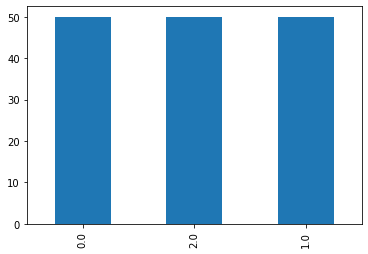

In [ ]:
#check the samples for each class
iris.target.value_counts().plot(kind='bar'); #balanced dataset

In [ ]:
#check for missing data, duplicates
print('missing values -> {}'.format(iris.isna().sum().sum()))
print('duplicate values -> {}'.format(iris.duplicated().sum())) #-> Why?

missing values -> 0
duplicate values -> 1


In [ ]:
#drop duplicates
iris.drop_duplicates(inplace=True)
#test
print('duplicate values -> {}'.format(iris.duplicated().sum()))

duplicate values -> 0


In [ ]:
#split the features and target
X = iris.iloc[:,:-1]
y = iris.iloc[:, -1]
#Split dataset into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    shuffle = True,random_state=13)

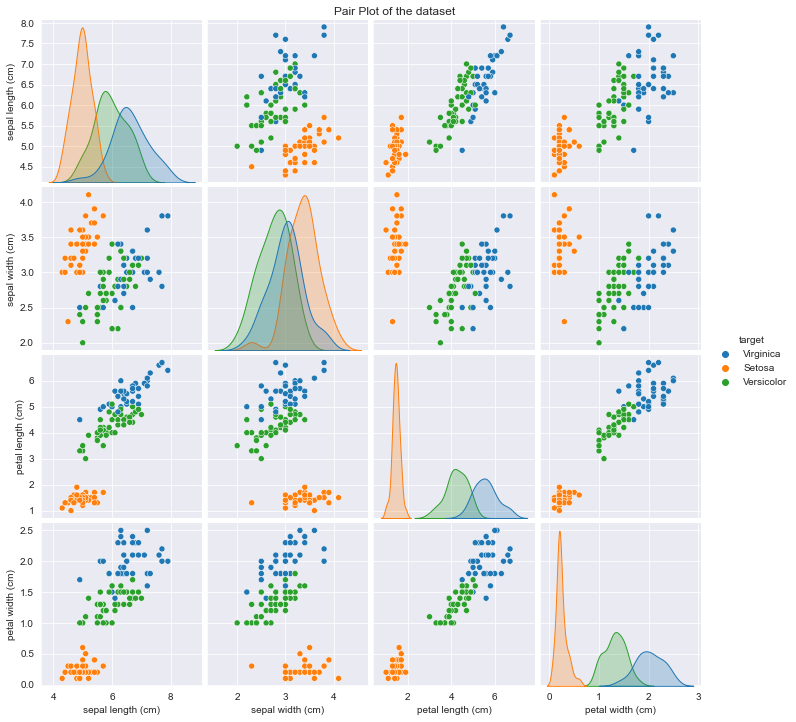

In [ ]:
# view the relationships between variables; color code by species type
sns.set_style('darkgrid')
iris_df = pd.DataFrame(data= np.c_[X_train, y_train],
                          columns = iris_raw['feature_names'] + ['target'] )
di = {0.0: "Setosa", 1.0: "Versicolor", 2.0 : "Virginica"}

before = sns.pairplot(iris_df.replace({"target": di}), hue='target')
before.fig.suptitle("Pair Plot of the dataset", y=1);

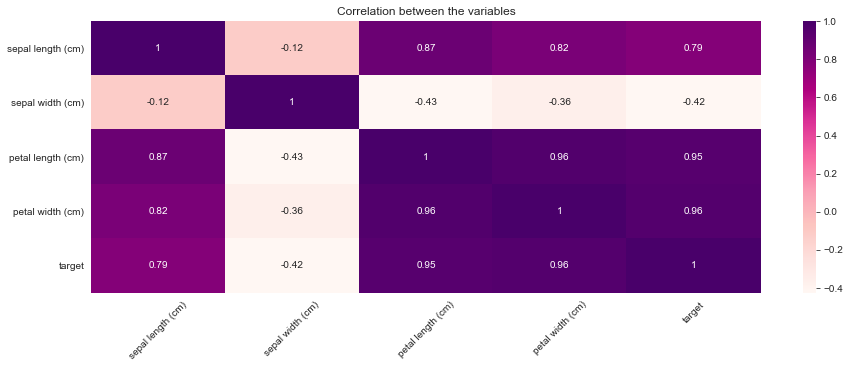

In [ ]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(15,5))         # Sample figsize in inches
sns.heatmap(iris.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

### Observations: 
- Petal length & width are highly correlated with eachother. 
- Petal length & width are highly correlated with the target.
- Petal length & width are also correlated with the sepal length, but not the width.
- We will work on two features only: petal length & width for better visualization.

## Should we normalize our data?
Please check: https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn/287439
<img src="https://i.stack.imgur.com/OCUmI.png" align = 'left' style="100px">
<img src="https://i.stack.imgur.com/J5r01.png" align = 'right' style="100px">

In [ ]:
#normalize iris data -> y = (x – min) / (max – min)
scaler = preprocessing.MinMaxScaler()

#fit on training only -> transform on testing ---> Why?!
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

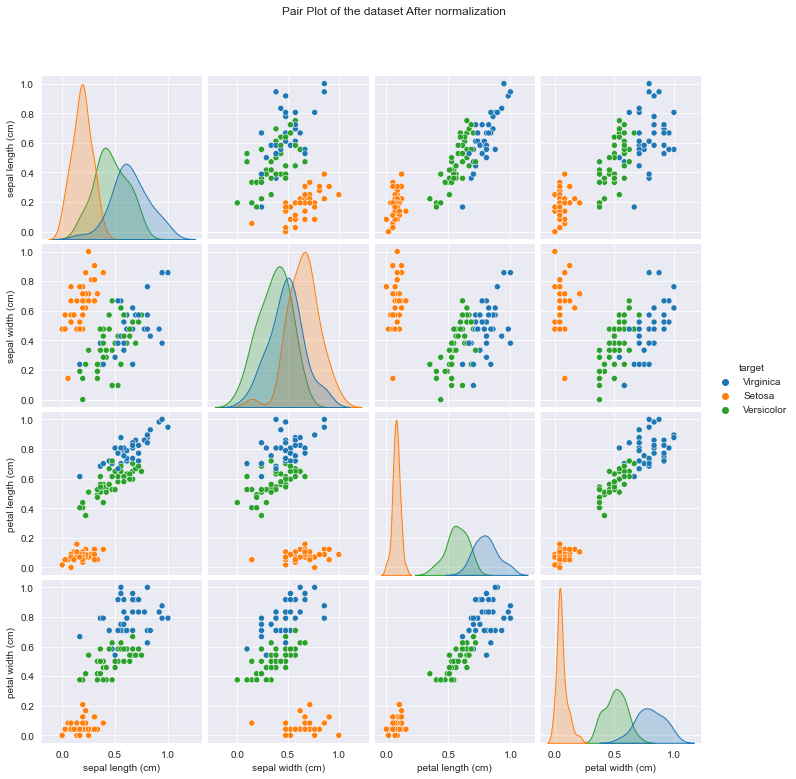

In [ ]:
#plot the pairgrid again after normalization
iris_2 = pd.DataFrame(data= np.c_[X_train_normalized, y_train],
                          columns = iris_raw['feature_names'] + ['target'] )
di = {0.0: "Setosa", 1.0: "Versicolor", 2.0 : "Virginica"}
after = sns.pairplot(iris_2.replace({"target": di}), hue='target')
after.fig.suptitle("Pair Plot of the dataset After normalization", y=1.08);

Check this link for better visualization: https://gist.github.com/ajeyjoshi/e74e8c7f8bd389195efe163d1ab5bdc4

## Selecting Features and One Hot Encoding

In [ ]:
#choose X to be the petal length/width only as we agreed before
X_train = X_train_normalized[:,2:4]
X_test = X_test_normalized[:,2:4]

In [ ]:
X_train

array([[0.78947368, 0.70833333],
       [0.0877193 , 0.        ],
       [0.0877193 , 0.125     ],
       [0.80701754, 0.95833333],
       [0.70175439, 0.75      ],
       [0.57894737, 0.5       ],
       [0.12280702, 0.16666667],
       [0.61403509, 0.58333333],
       [0.61403509, 0.58333333],
       [0.07017544, 0.        ],
       [0.0877193 , 0.04166667],
       [0.80701754, 0.54166667],
       [0.56140351, 0.5       ],
       [0.87719298, 0.70833333],
       [0.71929825, 0.79166667],
       [0.89473684, 1.        ],
       [0.0877193 , 0.04166667],
       [0.40350877, 0.375     ],
       [0.05263158, 0.04166667],
       [0.63157895, 0.58333333],
       [0.12280702, 0.08333333],
       [0.56140351, 0.45833333],
       [0.66666667, 0.70833333],
       [0.85964912, 0.91666667],
       [0.0877193 , 0.        ],
       [0.49122807, 0.41666667],
       [0.10526316, 0.04166667],
       [0.50877193, 0.41666667],
       [0.75438596, 0.75      ],
       [0.87719298, 1.        ],
       [0.

In [ ]:
#we can also perform one hot encoding for the target
encoder = preprocessing.OneHotEncoder()
encoder.fit(np.array(y).reshape(-1,1))

y_train_encoded = encoder.transform(np.array(y_train).reshape(-1,1)).todense()
y_test_encoded = encoder.transform(np.array(y_test).reshape(-1,1)).todense()

y_train_encoded

matrix([[0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0

# Use KNN

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train_encoded)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test_encoded)

print (f"training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples")

training set size: 119 samples 
test set size: 30 samples


In [ ]:
#try the model on our data
K_list = []
acc_list = []
for K in range(1,26):
    knn= KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train , y_train) #fit the model
    y_pred = knn.predict(X_test) #predict the test set
    acc = np.round(accuracy_score(y_test, y_pred)*100,2) #get model's accuracy
    K_list.append(K)
    acc_list.append(acc)
np.unique(acc_list)

array([86.67, 90.  , 93.33, 96.67])

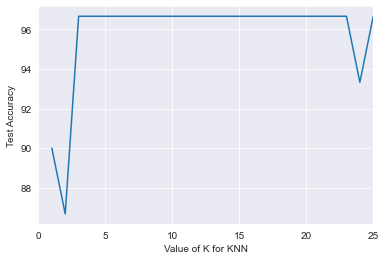

In [ ]:
plt.plot(K_list, acc_list);
plt.xlabel('Value of K for KNN');
plt.ylabel('Test Accuracy');
plt.xlim([0,25]);

# Cross Validation for Model Selection
We want to test the performance of a model (or a bunch of models) on our dataset:-
1. **Validation Set Approach** <br>
We usually split our data into two datasets: training and testing. We train our model using the training data and test the performance using the testing data. This is not optimal as while trying different models and improving the performance, we could be creating a model that learns the testing data. Also, the fact that the performance can change depending on how we split our data makes it worse.
> To solve this issue, we can split our data into 3 datasets: training, testing, and validation (60/20/20). The validation dataset is then used while choosing the model and the testing data will only be seen in the final evaluation. **Is this optimal?** 
2. **K-fold cross validation** 
> In K-fold, the testing data is left as it is, however, the training data is divided into K parts(folds). The model is trained as usual on K-1 of the folds as a training set while one of the folds is held out for validation. This process is repeated untill each fold is used for validation once. The performance measure (accuracy, for example) is the average of the values calculated during the process. This solves the constant training/validation data issue.
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="450" align='center'>

3. **Leave one out cross validation (LOOCV)** <br>
LOO is similar to K-fold CV where K equals the number of samples in the training set. If the dataset has *n* samples then *n-1* samples are used for training while 1 sample is used for validation. This approach can achieve better results, especially if the dataset is small, however, it is computationally expenssive. 

<br>

**This method is used for selecting the best model among a bunch of candidate models.**

We will work on choosing between Decision trees, Logistic Regression and KNN for our classification


## Validation Set Approach

In [ ]:
#Split the dataset
X_train_, X_test_, y_train_, y_test_ = X_train, X_test, y_train, y_test #train - test
X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train_,y_train_, train_size=0.8, shuffle=True) #train - validation

#test KNN with the validation set
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_ , y_train_) #fit the model
y_pred_ = knn.predict(X_val_) #predict the test set
acc = np.round(accuracy_score(y_val_, y_pred_)*100,2) #get model's accuracy
acc

95.83

## K-Folds

In [ ]:
#KNN
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Average Score for KNN = {}'.format(np.round(scores.mean()*100,2)))

#DTrees
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Average Score for DTrees = {}'.format(np.round(scores.mean()*100,2)))

Average Score for KNN = 95.83
Average Score for DTrees = 94.13


## LOO

In [ ]:
X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [ ]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=loo) #notice the difference
print('Average Score for KNN = {}'.format(np.round(scores.mean()*100,2)))

Average Score for KNN = 96.64


## GridSearch CV
After we decide to use a certain model based on the CV scores, we should try to find the best parameters for it to obtain the best performance. 

In [ ]:
K_range = list(range(1, 31)) #K neighbors to try

#grid parameters to try
param_grid = {'n_neighbors': K_range,
             'p': [1,2]}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=loo, scoring='accuracy', return_train_score=True)
grid_search=grid.fit(X_train, y_train)

In [ ]:
#get the best parameters
print(grid_search.best_params_)
print('Best Acc = ', grid_search.best_score_*100)

{'n_neighbors': 3, 'p': 1}
Best Acc =  96.63865546218487


In [ ]:
#test 
y_pred = grid_search.best_estimator_.predict(X_test) 
acc = accuracy_score(y_pred, y_test)
print('Accuracy of KNN = {}%'.format(np.round(acc*100,2)))

Accuracy of KNN = 96.67%


# Kd_tree 
Read this for better understanding of different search algorithms: https://ashokharnal.wordpress.com/tag/ball-tree-explained-in-simple-manner/

In [ ]:
knn= KNeighborsClassifier(1, p=1, algorithm = 'kd_tree')
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
print(f'The accuracy is {np.round(accuracy_score(y_test, y_pred)*100,2)}%')

The accuracy is 90.0%


# Closing Remarks:
### KNN
| **Pros** | **Cons** 
| --- | ---  
|Very easy to explain, simple to understand, and extremely powerful	| The efficiency of the algorithm declines very fast as the dataset grows in dimension
| Does not require any assumptions on the data distribution. The first choice when there is no prior knowledge or very little knowledge about the data distribution	| Comes at a cost of making the prediction step relatively expensive. Every time a prediction is to be made, it searches for the nearest neighbor in the complete training set.
| Can be used for both regression and classification problems | It suffers from skewed class distributions meaning if a specific class occurs frequently in the training set then it is most likely to dominate the majority voting of the new example
| Can be used easily with multiclass datasets | Can't work if there are any missing values

### Why Feature Engineering is important?

### Example from the MIT lecture : 

Link: https://www.youtube.com/watch?v=h0e2HAPTGF4&t=2362s
> Suppose we want to classify the following three animals as either reptiles or not based on 4 binary features and 1 integer feature. We used the euclidean distance which seprated them good enough; <br>


<img src="https://i.ibb.co/mhThDWY/img1.png" width="450" align='left'> | <img src="https://i.ibb.co/16bxPzB/img2.png" width="450" align='right'>


> As seen above, the distance between boa constrictor and rattlesnake is much less that the distance between any of them and the dart frog. **But, what happens if we added an aligator?**

<img src="https://i.ibb.co/9Y69KG9/img3.png" width="520" align='left'> | <img src="https://i.ibb.co/nD0xPfF/img4.png" width="450" align = 'right'>
